In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.optimize import curve_fit

In [12]:
def proportion(x, a):
    return a * x

def line(x, a, b):
    return a * x + b

def tanh(x, a, b):
    return a * np.tanh(b * x)

def parabola(x, a):
    return a * x**2

def gauss_func(x, a, mu, sigma):
    return a * np.exp(-(x - mu)**2 / (2 * sigma**2))

In [4]:
# データの用意
data_proportion = np.array([
        [1, 2, 3, 4, 5],
        [2, 4.2, 5.3, 8, 10.1],
                           ])
data_line = np.array([
        [0, 1, 2, 3, 4, 5],
        [2, 4, 6.2, 7.3, 10, 12.1],
                           ])
data_tanh = np.array([
        [1, 2, 3, 4, 5],
        [1, 2, 2.5, 3, 3],
                           ])
data_parabola = np.array([
        [1, 2, 3, 4, 5],
        [1, 4.1, 8.8, 15, 24.6],
                           ])
data_gauss_func = np.array([
        [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5],
        [0, 0.5, 2.5, 4.5, 6, 7, 6.5, 4.5, 2.4, 0.5, 0],
                           ])

In [5]:
# パラメータの初期値の設定
param_init_dict = {
        "proportion":[2],
        "line":[2, 2],
        "tanh":[3, 0.6],
        "parabola":[1],
        "gauss_func":[7, 2.5, 1]
        }
# グラフ描画用のサンプルデータ
sample_x = np.arange(0, 5, 0.01)

In [6]:
# フィッティングを行うための関数
def fit(func, x, param_init):
    """
    func:データxに近似したい任意の関数
    x:データ
    param_init:パラメータの初期値
    popt:最適化されたパラメータ
    pocv:パラメータの共分散
    """
    X = x[0]
    Y = x[1]
    popt,pocv=curve_fit(func, X, Y, p0=param_init)
    perr = np.sqrt(np.diag(pocv)) #対角成分が各パラメータの標準誤差に相当
    y=func(sample_x, *popt)
    return y, popt, perr

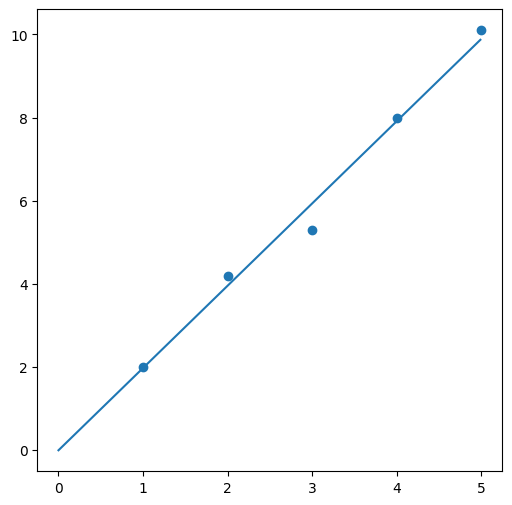

In [7]:
result = fit(proportion, data_proportion, param_init_dict["proportion"])
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(data_proportion[0], data_proportion[1])
ax.plot(sample_x, result[0])

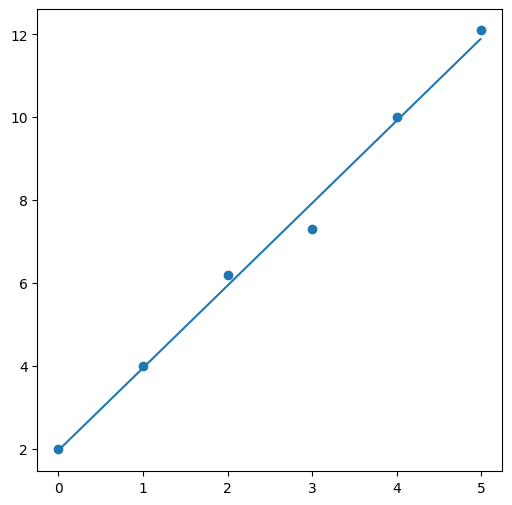

In [9]:
result = fit(line, data_line, param_init_dict["line"])
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(data_line[0], data_line[1])
ax.plot(sample_x, result[0])

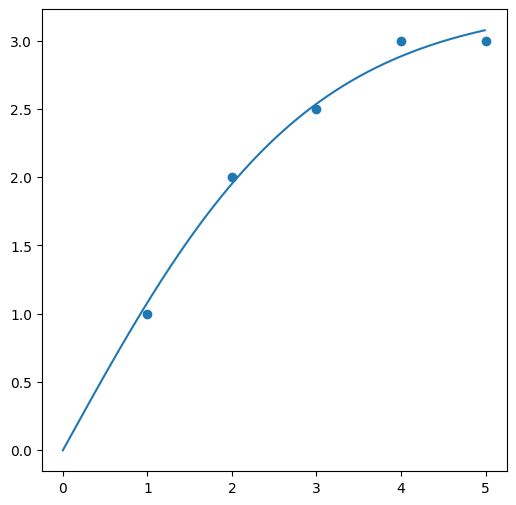

In [10]:
result = fit(tanh, data_tanh, param_init_dict["tanh"])
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(data_tanh[0], data_tanh[1])
ax.plot(sample_x, result[0])

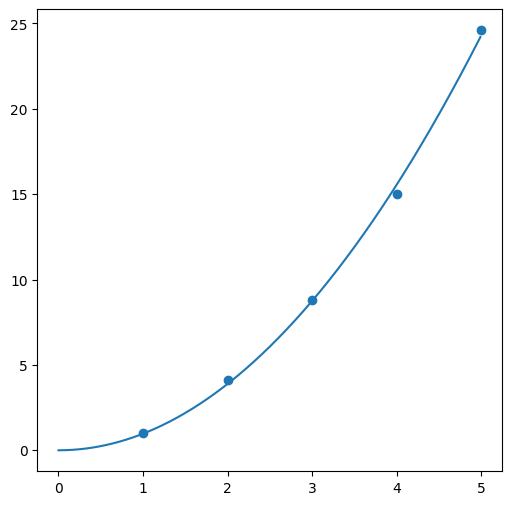

In [13]:
result = fit(parabola, data_parabola, param_init_dict["parabola"])
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(data_parabola[0], data_parabola[1])
ax.plot(sample_x, result[0])

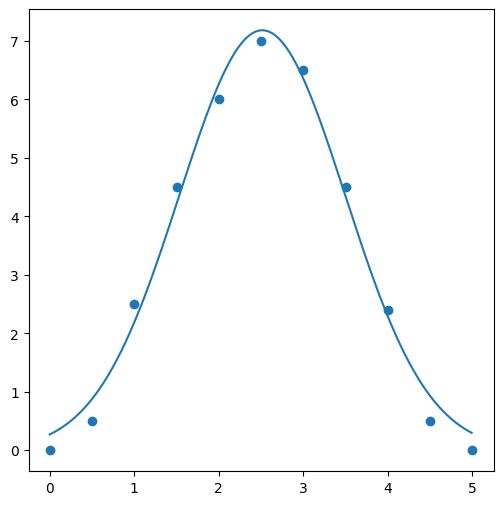

In [14]:
result = fit(gauss_func, data_gauss_func, param_init_dict["gauss_func"])
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(data_gauss_func[0], data_gauss_func[1])
ax.plot(sample_x, result[0])